## Project 1: Linear and Logistic Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("sgemm_product.csv")
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


## Checking Levels

In [3]:
for i in data.columns[:14]:
    print(data[i].value_counts())

128    99808
64     75584
32     47264
16     18944
Name: MWG, dtype: int64
128    99808
64     75584
32     47264
16     18944
Name: NWG, dtype: int64
32    143648
16     97952
Name: KWG, dtype: int64
8     124928
16     85376
32     31296
Name: MDIMC, dtype: int64
8     124928
16     85376
32     31296
Name: NDIMC, dtype: int64
16    92352
8     85696
32    63552
Name: MDIMA, dtype: int64
16    92352
8     85696
32    63552
Name: NDIMB, dtype: int64
8    120800
2    120800
Name: KWI, dtype: int64
1    99808
2    75584
4    47264
8    18944
Name: VWM, dtype: int64
1    99808
2    75584
4    47264
8    18944
Name: VWN, dtype: int64
1    120800
0    120800
Name: STRM, dtype: int64
1    120800
0    120800
Name: STRN, dtype: int64
1    120800
0    120800
Name: SA, dtype: int64
1    120800
0    120800
Name: SB, dtype: int64


## Averaging Run Values

In [4]:
data["Avg_Run"]=data[["Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"]].mean(axis=1)
data=data.drop(columns=["Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Avg_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [5]:
data.isnull().sum()

MWG        0
NWG        0
KWG        0
MDIMC      0
NDIMC      0
MDIMA      0
NDIMB      0
KWI        0
VWM        0
VWN        0
STRM       0
STRN       0
SA         0
SB         0
Avg_Run    0
dtype: int64

## Data Partition

In [6]:
from sklearn.model_selection import train_test_split

def data_part(X, y, split_size) :
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = split_size)
    print(X_train.shape)
    print(X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [7]:
X=data.drop(["Avg_Run"],axis=1)
y=data["Avg_Run"]

## Data Prep

In [8]:
X_train, X_test, y_train, y_test=data_part(X,y,split_size=0.2)
X_train=np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
y_train_binary= np.where(y_train>np.median(y),1,0)
y_test_binary= np.where(y_test>np.median(y),1,0)
Beta= np.zeros((X_train.shape[1]))
m=len(X_train)


(193280, 14)
(48320, 14)


## Linear Regression

In [9]:
def LR(X,y,Beta):
    y_hat= np.dot(X_train,Beta)
    error=y_hat-y_train
    return error   

## Cost Function

In [10]:

def cost(err):
    cost = (1/m) *0.5* np.sum(np.square(err))
    return cost   

## Gradient Descent

In [11]:
i=0
def grd(X,y,Beta,alpha,epochs):
    cost_list=[]
    error_list=[]
    cost_list.append(cost(LR(X,y,Beta)))
    for i in range(epochs):
            error=LR(X,y,Beta)
            sq_error= np.sum(np.square(error))
            error_list.append(sq_error)
            c=cost(LR(X,y,Beta))
            cost_list.append(c)
            Beta_Der = (1/m)*X_train.T.dot(error)
            Beta=Beta- alpha*Beta_Der
            i=i+1
            if cost_list[-1]>cost_list[-2]:
                break
    return cost_list,Beta


## RMSE

In [12]:
def mse(X,y,Beta):
    m=len(y)
    y_hat= X.dot(Beta)
    rmse= np.sqrt((np.sum(np.square(y-y_hat))/m))
    return rmse

In [24]:
cost_list1=[]
Beta1=[]
cost_list1,Beta1=grd(X_train,y_train,Beta,0.00001,30000)
training_rmse1=mse(X_train,y_train,Beta1)
testing_rmse1=mse(X_test,y_test,Beta1)

In [28]:
cost_list2=[]
Beta2=[]
cost_list2,Beta2=grd(X_train,y_train,Beta,0.00005,30000)
training_rmse2=mse(X_train,y_train,Beta2)
testing_rmse2=mse(X_test,y_test,Beta2)

In [30]:
cost_list3=[]
Beta3=[]
cost_list3,Beta3=grd(X_train,y_train,Beta,0.0001,30000)
training_rmse3=mse(X_train,y_train,Beta3)
testing_rmse3=mse(X_test,y_test,Beta3)

In [32]:
Errors= pd.DataFrame(
    {'Alpha': [0.00001,0.00005,0.0001],
     'Training_RMSE': [training_rmse1,training_rmse2,training_rmse3],
     'Testing_RMSE': [testing_rmse1,testing_rmse2,testing_rmse3]
    })
Errors.head()

,Alpha,Training_RMSE,Testing_RMSE
0,0.00001,285.370002,285.156827
1,0.00005,284.744252,284.481720
2,0.00010,284.356382,284.089762


In [34]:
cl4=[]
b4=[]
cl4,b4=grd(X_train,y_train,Beta,0.0001,10000)
training_rmse4=mse(X_train,y_train,b4)
testing_rmse4=mse(X_test,y_test,b4)

In [35]:
cl5=[]
b5=[]
cl5,b5=grd(X_train,y_train,Beta,0.0001,25000)
training_rmse5=mse(X_train,y_train,b5)
testing_rmse5=mse(X_test,y_test,b5)

In [36]:
cl6=[]
b6=[]
cl6,b6=grd(X_train,y_train,Beta,0.0001,45000)
training_rmse6=mse(X_train,y_train,b6)
testing_rmse6=mse(X_test,y_test,b6)

In [37]:
Epochs= pd.DataFrame(
    {'Epochs': [10000,25000,45000],
     'Training_RMSE': [training_rmse4,training_rmse5,training_rmse6],
     'Testing_RMSE': [testing_rmse4,testing_rmse5,testing_rmse6]
    })

Epochs.head()

,Epochs,Training_RMSE,Testing_RMSE
0,10000,284.954704,284.697657
1,25000,284.454744,284.188834
2,45000,284.172829,283.905695


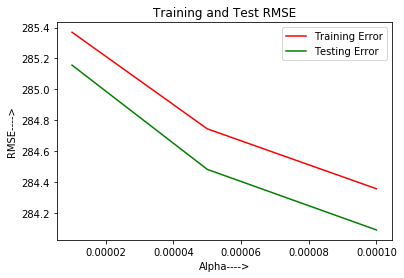

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(Errors["Alpha"],Errors["Training_RMSE"],label="Training Error",color="red")
plt.plot(Errors["Alpha"],Errors["Testing_RMSE"],label="Testing Error",color="green")
plt.xlabel("Alpha---->")
plt.ylabel("RMSE---->")
plt.title("Training and Test RMSE")
plt.legend()
plt.show()
plt.savefig("Train & Test RMSE")

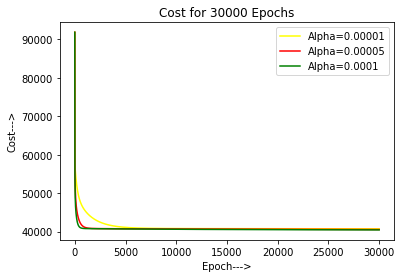

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(list(range(30000)),cost_list1[1:],label="Alpha=0.00001",color='yellow')
plt.plot(list(range(30000)),cost_list2[1:],label="Alpha=0.00005",color="red")
plt.plot(list(range(30000)),cost_list3[1:],label="Alpha=0.0001",color="green")
plt.legend()
plt.xlabel("Epoch--->")
plt.ylabel("Cost--->")
plt.title("Cost for 30000 Epochs")
plt.show()
plt.savefig("cost for 30000")

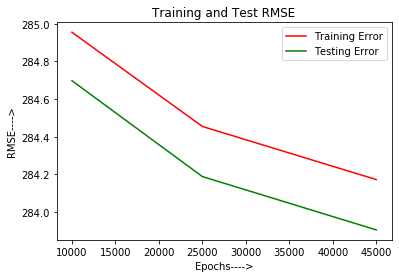

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(Epochs["Epochs"],Epochs["Training_RMSE"],label="Training Error",color="red")
plt.plot(Epochs["Epochs"],Epochs["Testing_RMSE"],label="Testing Error",color="green")
plt.xlabel("Epochs---->")
plt.ylabel("RMSE---->")
plt.title("Training and Test RMSE")
plt.legend()
plt.show()
plt.savefig("Train and Test")

## Logisitic Regression

In [50]:
def Logistic(X,Beta):
    y_hat_logit= 1/(1+ np.exp(-np.dot(X,Beta)))
    return y_hat_logit
    

## Cost Function

In [51]:
def cost_logit(X,y,Beta,y_bin):
    cost_logit= -1/m*np.sum((y_train_binary*np.log(Logistic(X_train,Beta)) + (1-y_train_binary)*np.log(1-Logistic(X_train,Beta))))
    return cost_logit
    

## Gradient Descent

In [52]:
i=0
def Logit_Grad_Descent(X,y,Beta,alpha,epochs):
    cost_logit_list=[]
    error_log=[]
    cost_logit_list.append(cost_logit(X_train,y_train,Beta,y_train_binary))
    for i in range(epochs):
        error=Logistic(X_train,Beta)-y_train_binary
        sq_err_log= np.sum(np.square(error))
        error_log.append(sq_err_log)
        cost_log=cost_logit(X_train,y_train,Beta,y_train_binary) 
        cost_logit_list.append(cost_log)
        Beta_Der_logit=(1/m)*X_train.T.dot(error)
        Beta=Beta-alpha*Beta_Der_logit
        if cost_logit_list[-1]>cost_logit_list[-2]:
            break
    return cost_logit_list,Beta
    

## Accuracy

In [53]:
def accuracy(X,y,Beta):
    y_hat_logit= 1/(1+ np.exp(-np.dot(X,Beta)))
    y_hat_logit= np.where(y_hat_logit>=0.5,1,0)
    j=0
    for i in range(len(y_hat_logit)):
        if y_hat_logit[i]==y[i]:
            j=j+1
    acc= (j/len(y))*100
    return acc
    

In [47]:
cost_log1=[]
beta_log1=[]
cost_log1,beta_log1=Logit_Grad_Descent(X_train,y_train,Beta,0.00052,30000)
training_acc1=accuracy(X_train,y_train_binary,beta_log1)
testing_acc1=accuracy(X_test,y_test_binary,beta_log1)

In [48]:
cost_log2=[]
beta_log2=[]
error_log2=[]
cost_log2,beta_log2=Logit_Grad_Descent(X_train,y_train,Beta,0.00035,30000)
training_acc2=accuracy(X_train,y_train_binary,beta_log2)
testing_acc2=accuracy(X_test,y_test_binary,beta_log2)

In [49]:
cost_log3=[]
beta_log3=[]
error_log3=[]
cost_log3,beta_log3=Logit_Grad_Descent(X_train,y_train,Beta,0.0001,30000)
training_acc3=accuracy(X_train,y_train_binary,beta_log3)
testing_acc3=accuracy(X_test,y_test_binary,beta_log3)

In [50]:
Accuracy= pd.DataFrame(
    {'Alpha': [0.00052,0.00035,0.0001],
     'Training_Accuracy': [training_acc1,training_acc2,training_acc3],
     'Testing_Accuracy': [testing_acc1,testing_acc2,testing_acc3]
    })
Accuracy.head()

,Alpha,Training_Accuracy,Testing_Accuracy
0,0.00052,82.211817,82.226821
1,0.00035,82.401697,82.415149
2,0.00010,82.473096,82.547599


In [51]:
cost_log4=[]
beta_log4=[]
error_log4=[]
cost_log4,beta_log4=Logit_Grad_Descent(X_train,y_train,Beta,0.0001,15000)
training_acc4=accuracy(X_train,y_train_binary,beta_log4)
testing_acc4=accuracy(X_test,y_test_binary,beta_log4)

In [52]:
cost_log5=[]
beta_log5=[]
error_log5=[]
cost_log5,beta_log5=Logit_Grad_Descent(X_train,y_train,Beta,0.0001,35000)
training_acc5=accuracy(X_train,y_train_binary,beta_log5)
testing_acc5=accuracy(X_test,y_test_binary,beta_log5)

In [53]:
cost_log6=[]
beta_log6=[]
error_log6=[]
cost_log6,beta_log6=Logit_Grad_Descent(X_train,y_train,Beta,0.0001,50000)
training_acc6=accuracy(X_train,y_train_binary,beta_log6)
testing_acc6=accuracy(X_test,y_test_binary,beta_log6)

In [54]:
Epochs_Logit= pd.DataFrame(
    {'Epochs': [15000,35000,50000],
     'Training_Accuracy': [training_acc4,training_acc5,training_acc6],
     'Testing_Accuracy': [testing_acc4,testing_acc5,testing_acc6]
    })

Epochs_Logit.head()

,Epochs,Training_Accuracy,Testing_Accuracy
0,15000,82.524834,82.572434
1,35000,82.478270,82.510348
2,50000,82.484996,82.417219


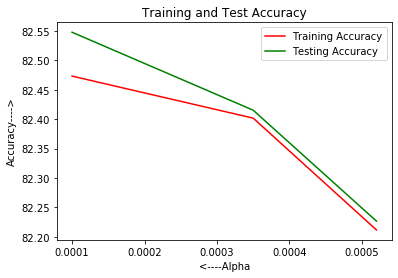

<Figure size 432x288 with 0 Axes>

In [59]:
plt.plot(Accuracy["Alpha"],Accuracy["Training_Accuracy"],label="Training Accuracy",color="red")
plt.plot(Accuracy["Alpha"],Accuracy["Testing_Accuracy"],label="Testing Accuracy",color="green")
plt.xlabel("<----Alpha")
plt.ylabel("Accuracy---->")
plt.title("Training and Test Accuracy")
plt.legend()
plt.show()
plt.savefig("Train and Test Accuracy")

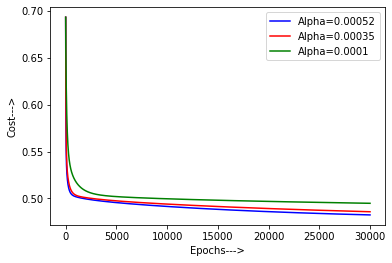

In [56]:
plt.plot(list(range(30000)),cost_log1[1:],label="Alpha=0.00052",color="blue")
plt.plot(list(range(30000)),cost_log2[1:],label="Alpha=0.00035",color="red")
plt.plot(list(range(30000)),cost_log3[1:],label="Alpha=0.0001",color="green")
plt.legend()
plt.xlabel("Epochs--->")
plt.ylabel("Cost--->")
plt.show()

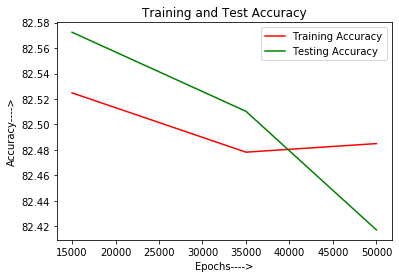

<Figure size 432x288 with 0 Axes>

In [60]:
plt.plot(Epochs_Logit["Epochs"],Epochs_Logit["Training_Accuracy"],label="Training Accuracy",color="red")
plt.plot(Epochs_Logit["Epochs"],Epochs_Logit["Testing_Accuracy"],label="Testing Accuracy",color="green")
plt.xlabel("Epochs---->")
plt.ylabel("Accuracy---->")
plt.title("Training and Test Accuracy")
plt.legend()
plt.show()
plt.savefig("Train and Test Accuracy Epochs")

In [61]:
print("Best Parameters for Linear Regression",b6)

Best Parameters for Linear Regression [ -4.25000386   3.31079403   3.04519291   4.79255995 -16.90026874
 -16.5762697    0.82167159   0.89365921   3.32511614  -1.98740849
  -3.43873574  -8.02437306  -0.86566403  24.44134146  30.60833305]


In [68]:
print("Best Parameters for Logistic Regression",beta_log6)

Best Parameters for Logistic Regression [-0.0304639   0.02912615  0.01847307  0.007498   -0.11317141 -0.09742181
 -0.01053912 -0.01201663 -0.02121825 -0.05751749 -0.08874953 -0.12882606
 -0.02316424 -0.1586742  -0.04212807]


## Modeling Using Statsmodels

In [74]:
import statsmodels.api as sm
model=sm.OLS(y_train,sm.add_constant(X_train))
result_LR=model.fit()
print(result_LR.summary())

                            OLS Regression Results                            
Dep. Variable:                Avg_Run   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     9502.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:53:39   Log-Likelihood:            -1.3650e+06
No. Observations:              193280   AIC:                         2.730e+06
Df Residuals:                  193265   BIC:                         2.730e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.3933      3.808    -13.234      0.0

In [75]:
logit_model=sm.Logit(y_train_binary,X_train)
result_logit=logit_model.fit()
print(result_logit.summary())
pred= result_logit.predict(X_test)

Optimization terminated successfully.
         Current function value: 0.476880
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               193280
Model:                          Logit   Df Residuals:                   193265
Method:                           MLE   Df Model:                           14
Date:                Thu, 13 Feb 2020   Pseudo R-squ.:                  0.3120
Time:                        19:53:39   Log-Likelihood:                -92171.
converged:                       True   LL-Null:                   -1.3397e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3018      0.034     -8.958      0.000      -0.368      -0.236
x1             0.0312      0.

In [86]:
pred_test= result_logit.predict(X_test)
pred_test=np.where(pred_test>=0.5,1,0)
pred_tr= result_logit.predict(X_train)
pred_tr=np.where(pred_tr>=0.5,1,0)

## Calculating Metrics

In [87]:
from sklearn.metrics import accuracy_score,mean_squared_error
train_er= np.sqrt(mean_squared_error(y_train,result_LR.predict(X_train)))
test_er= np.sqrt(mean_squared_error(y_test,result_LR.predict(X_test)))
train_acc= accuracy_score(y_train_binary,pred_tr)
test_acc= accuracy_score(y_test_binary,pred_test)

In [88]:
train_er,test_er,train_acc,test_acc

(282.3507009109299, 289.7823509086289, 0.8106167218543047, 0.8098716887417219)

## Selected Model

In [55]:
training_rmse8=mse(X_train[:,0:9],y_train,grd(X_train[:,0:9],y_train,Beta,0.0001,25000)[1][:9])
testing_rmse8=mse(X_test[:,0:9],y_test,grd(X_train[:,0:9],y_train,Beta,0.0001,25000)[1][:9])

In [56]:
training_acc8=accuracy(X_train[:,0:9],y_train_binary,Logit_Grad_Descent(X_train[:,0:9],y_train_binary,Beta,0.0001,15000)[1][:9])
testing_acc8=accuracy(X_test[:,0:9],y_test_binary,Logit_Grad_Descent(X_train[:,0:9],y_train_binary,Beta,0.0001,15000)[1][:9])

In [60]:
Selected_LR=pd.DataFrame({"Alpha":[0.001],"Epochs":[25000],"Train RMSE": training_rmse8,"Test RMSE":testing_rmse8})
Selected_Logit=pd.DataFrame({"Alpha":[0.001],"Epochs":[15000],"Train Accuracy": training_acc8,"Test Accuracy":testing_acc8})

In [61]:
Selected_LR

,Alpha,Epochs,Train RMSE,Test RMSE
0,0.001,25000,284.09947,291.691423


In [59]:
Selected_Logit

,Alpha,Epochs,Train Accuracy,Test Accuracy
0,0.001,15000,76.324503,76.367964


## Generating Random Number For Feature Selection

In [64]:
import random
rand_cols=random.sample(range(1,15),9)

In [65]:
rand_cols

[6, 7, 10, 2, 4, 9, 8, 11, 1]

## RMSE and Accuracy of Random Model


In [69]:
training_rmse_rand=mse(X_train[:,rand_cols],y_train,grd(X_train[:,rand_cols],y_train,Beta,0.0001,25000)[1][rand_cols])
testing_rmse_rand=mse(X_test[:,rand_cols],y_test,grd(X_train[:,rand_cols],y_train,Beta,0.0001,25000)[1][rand_cols])

In [67]:
training_acc_rand=accuracy(X_train[:,rand_cols],y_train_binary,Logit_Grad_Descent(X_train[:,rand_cols],y_train_binary,Beta,0.0001,15000)[1][rand_cols])
testing_acc_rand=accuracy(X_test[:,rand_cols],y_test_binary,Logit_Grad_Descent(X_train[:,rand_cols],y_train_binary,Beta,0.0001,15000)[1][rand_cols])

In [70]:
Rand_LR=pd.DataFrame({"Alpha":[0.001],"Epochs":[25000],"Train RMSE": training_rmse_rand,"Test RMSE":testing_rmse_rand})
Rand_Logit=pd.DataFrame({"Alpha":[0.001],"Epochs":[15000],"Train Accuracy": training_acc_rand,"Test Accuracy":testing_acc_rand})

In [71]:
Rand_LR

,Alpha,Epochs,Train RMSE,Test RMSE
0,0.001,25000,324.274952,330.692754


In [72]:
Rand_Logit

,Alpha,Epochs,Train Accuracy,Test Accuracy
0,0.001,15000,60.775559,61.005795
